In [1]:
import tensorflow as tf

'''
A linear regression learning algorithm example using TensorFlow library.

Author: Aymeric Damien
Project: https://github.com/aymericdamien/TensorFlow-Examples/
'''

from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
import os

Epoch: 0050 cost= 0.102754444 W= 0.339465 b= 0.154938
Epoch: 0100 cost= 0.099773481 W= 0.33412 b= 0.19339
Epoch: 0150 cost= 0.097137041 W= 0.329093 b= 0.229556
Epoch: 0200 cost= 0.094805285 W= 0.324365 b= 0.26357
Epoch: 0250 cost= 0.092743017 W= 0.319918 b= 0.295561
Epoch: 0300 cost= 0.090919152 W= 0.315735 b= 0.32565
Epoch: 0350 cost= 0.089306153 W= 0.311801 b= 0.353948
Epoch: 0400 cost= 0.087879598 W= 0.308102 b= 0.380564
Epoch: 0450 cost= 0.086618014 W= 0.304622 b= 0.405598
Epoch: 0500 cost= 0.085502326 W= 0.301349 b= 0.429142
Epoch: 0550 cost= 0.084515698 W= 0.298271 b= 0.451285
Epoch: 0600 cost= 0.083643116 W= 0.295376 b= 0.472113
Epoch: 0650 cost= 0.082871549 W= 0.292653 b= 0.491701
Epoch: 0700 cost= 0.082189225 W= 0.290092 b= 0.510125
Epoch: 0750 cost= 0.081585847 W= 0.287683 b= 0.527453
Epoch: 0800 cost= 0.081052370 W= 0.285418 b= 0.543749
Epoch: 0850 cost= 0.080580577 W= 0.283287 b= 0.559078
Epoch: 0900 cost= 0.080163434 W= 0.281283 b= 0.573495
Epoch: 0950 cost= 0.079794593 W=

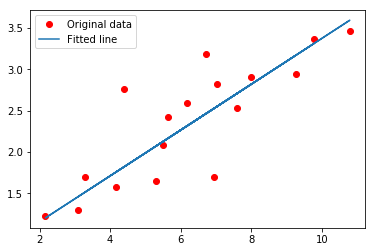

Testing... (Mean square loss Comparison)
Testing cost= 0.0763091
Absolute mean square loss difference: 0.00315944


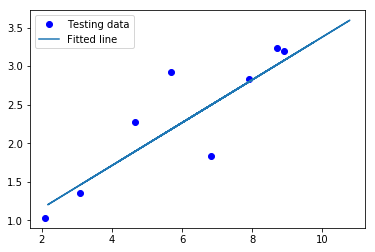

In [5]:
rng = numpy.random

# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50
log_dir = os.path.join(os.getenv('TENSORBOARD_LOG_DIR'), 'tensorflow-demo')

# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

g = tf.Graph()
with g.as_default():
  # tf Graph Input
  X = tf.placeholder("float")
  Y = tf.placeholder("float")

  # Set model weights
  W = tf.Variable(rng.randn(), name="weight")
  b = tf.Variable(rng.randn(), name="bias")

  # Construct a linear model
  pred = tf.add(tf.multiply(X, W), b)

  # Mean squared error
  cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

  # Gradient descent
  #  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
  optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

  # Initialize the variables (i.e. assign their default value)
  init = tf.global_variables_initializer()

  # Summaries
  tf.summary.scalar('loss', cost)
  summaries = tf.summary.merge_all()

  if not os.path.exists(log_dir): os.makedirs(log_dir)
  run_id = len([name for name in os.listdir(log_dir)])
  run_log_dir = os.path.join(log_dir, str(run_id))
  log_writer = tf.summary.FileWriter(run_log_dir, graph = tf.get_default_graph())


# Start training
with tf.Session(graph = g) as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            summary, c = sess.run([summaries, cost], feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))
            log_writer.add_summary(summary, epoch)

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()